# Проект: классификация

**Техническая задача для вас как для специалиста в Data Science:** построить модель машинного обучения, которая на основе предложенных характеристик клиента будет предсказывать, воспользуется он предложением об открытии депозита или нет.

[Датасет](https://lms.skillfactory.ru/assets/courseware/v1/dab91dc74eb3cb684755123d224d262b/asset-v1:SkillFactory+DST-3.0+28FEB2021+type@asset+block/bank_fin.zip)

[Ноутбук-шаблон](https://lms.skillfactory.ru/assets/courseware/v1/49573ace76275d21e852bc8fc5bb80bd/asset-v1:SkillFactory+DST-3.0+28FEB2021+type@asset+block/Project_4_ML.ipynb)

In [84]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from  sklearn.ensemble import IsolationForest
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing  import LabelEncoder
from sklearn import linear_model 
from sklearn import tree 
from sklearn import ensemble 
from sklearn import metrics 
from sklearn import preprocessing 
from sklearn.model_selection import train_test_split 
from sklearn.feature_selection import SelectKBest, f_classif

## Часть 1. Знакомство с данными, обработка пропусков и выбросов

Данные о клиентах банка:

+ age (возраст);
+ job (сфера занятости);
+ marital (семейное положение);
+ education (уровень образования);
+ default (имеется ли просроченный кредит);
+ housing (имеется ли кредит на жильё);
+ loan (имеется ли кредит на личные нужды);
+ balance (баланс).

Данные, связанные с последним контактом в контексте текущей маркетинговой кампании:

+ contact (тип контакта с клиентом);
+ month (месяц, в котором был последний контакт);
+ day (день, в который был последний контакт);
+ duration (продолжительность контакта в секундах).

Прочие признаки:

+ campaign (количество контактов с этим клиентом в течение текущей кампании);
+ pdays (количество пропущенных дней с момента последней маркетинговой кампании до контакта в текущей кампании);
+ previous (количество контактов до текущей кампании)
+ poutcome (результат прошлой маркетинговой кампании).

И, разумеется, наша целевая переменная **deposit**, которая определяет, согласится ли клиент открыть депозит в банке. Именно её мы будем пытаться предсказать в данном кейсе.

### Задание 2.1

В каком признаке пропущенных значений больше всего?

In [85]:
df = pd.read_csv('data/bank_fin.zip', sep = ';')

In [86]:
# исследуйте данные на предмет пропусков. Где есть пропущенные значения? Сколько их?
# ваш код
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   default    11162 non-null  object
 5   balance    11137 non-null  object
 6   housing    11162 non-null  object
 7   loan       11162 non-null  object
 8   contact    11162 non-null  object
 9   day        11162 non-null  int64 
 10  month      11162 non-null  object
 11  duration   11162 non-null  int64 
 12  campaign   11162 non-null  int64 
 13  pdays      11162 non-null  int64 
 14  previous   11162 non-null  int64 
 15  poutcome   11162 non-null  object
 16  deposit    11162 non-null  object
dtypes: int64(6), object(11)
memory usage: 1.4+ MB


Много категориальных признаков. Признак 'balance' имеет пропуски.

In [87]:
# количество пропусков в признаке 'balance'
df['balance'].isnull().sum()

25

### Задание 2.2

Введите слово, которым закодированы пропуски (неизвестные значения).

In [88]:
# есть ли в признаке job пропущенные значения? Возможно, они обозначены каким-то специальным словом?
# ваш код
df['job'].value_counts()

management       2566
blue-collar      1944
technician       1823
admin.           1334
services          923
retired           778
self-employed     405
student           360
unemployed        357
entrepreneur      328
housemaid         274
unknown            70
Name: job, dtype: int64

Значение признака 'unknown' является скрытым пропуском

### Задание 2.3

Вычислите среднее значение по преобразованному в корректный вид признаку balance. Ответ округлите до трёх знаков после точки-разделителя.

In [89]:
# преобразуйте признак balance таким образом, чтобы он корректно считывался, как вещественное число (float)
df['balance']

0         2 343,00 $ 
1            45,00 $ 
2         1 270,00 $ 
3         2 476,00 $ 
4           184,00 $ 
             ...     
11157         1,00 $ 
11158       733,00 $ 
11159        29,00 $ 
11160           0  $ 
11161           0  $ 
Name: balance, Length: 11162, dtype: object

In [90]:
# убираем знаки пробела и доллара, запятую меняем на точку
df['balance'] = df['balance'].apply(lambda x: str(x).replace(" ", "").replace("$", "").replace(",", "."))

In [91]:
# меняем признак на тип 'float'
df['balance'] = df['balance'].astype('float')

In [92]:
# вычислитм среднее значение по преобразованному в корректный вид признаку 'balance'
df['balance'].mean()

1529.1290293615875

### Задание 2.4

Вычислите среднее значение по преобразованному в корректный вид признаку balance. Ответ округлите до трёх знаков после точки-разделителя.

In [93]:
# обработайте пропуски в признаки balance , заменив их на медианные значения по данному признаку
# ваш код
df['balance'] = df['balance'].fillna(df['balance'].median())

In [94]:
# проверим на отсутствие пропусков в признаке
df['balance'].isna().sum()

0

In [95]:
# вычислитм среднее значение по преобразованному в корректный вид признаку 'balance'
df['balance'].mean()

1526.9360329690019

Ранее мы выяснили, что в признаке job есть пропущенные значения, которые не отображаются как пропуски в явном виде. Однако нам всё равно важно их обработать. Мы знаем, что для категориальных признаков пропущенные значения заменяются модой по данному признаку.

Замените все пропущенные значения в признаке job на модальные. То же самое сделайте с признаком, отвечающим за уровень образования.

### Задание 2.5

После замены пропусков рассчитайте средний баланс для клиентов с самой популярной работой и самым популярным уровнем образования (т. е. для тех, у кого одновременно самая популярная работа и самое популярное образование). Ответ округлите до трёх знаков после точки-разделителя.

In [96]:
# обработайте пропуски в категориальных признаках: job и education, заменив их на модальные значения
# ваш код

# скрытый пропуск имеет значение 'unknown', заменим его на numpy 'np.nan'
df['job'] = df['job'].apply(lambda x: np.nan if x == 'unknown' else x)
df['education'] = df['education'].apply(lambda x: np.nan if x == 'unknown' else x)

print('Количество пропусков в признаке job: {}'.format(df['job'].isna().sum()))
print('Количество пропусков в признаке education: {}'.format(df['education'].isna().sum()))

Количество пропусков в признаке job: 70
Количество пропусков в признаке education: 497


In [97]:
# заменим пропуски на модальное значения по каждому признаку
df['job'] = df['job'].fillna(df['job'].mode()[0])
df['education'] = df['education'].fillna(df['education'].mode()[0])

In [98]:
# проверим, что пропусков нет
print('Количество пропусков в признаке job: {}'.format(df['job'].isna().sum()))
print('Количество пропусков в признаке education: {}'.format(df['education'].isna().sum()))

Количество пропусков в признаке job: 0
Количество пропусков в признаке education: 0


In [99]:
# найдем самую популярную работу и образование
print(df['job'].mode())
print(df['education'].mode())

0    management
Name: job, dtype: object
0    secondary
Name: education, dtype: object


In [100]:
# обрежем датасет по указанным признакам
df_new = df[(df['job'] == 'management') & (df['education'] == 'secondary')]
df_new['balance'].mean()

1598.8829787234042

Изучите признак, отображающий баланс клиентов, на предмет выбросов.

В математической статистике есть несколько подходов, позволяющих определить наличие выбросов. Мы будем считать, что выбросы находятся за пределами отрезка, нижняя граница которого определяется как нижний квартиль, из которого вычли полтора межквартильных размаха (Q1 - 1.5 * IQR) , а верхняя граница — как верхний квартиль, к которому прибавили полтора межквартильных размаха. (Q3 + 1.5 * IQR). Найдите эти границы, и отфильтруйте значения так, чтобы выбросов в данных не осталось.

### Задание 2.6

Введите верхнюю и нижнюю границы поиска выбросов по методу Тьюки, округлив их до целых чисел.

In [101]:
# найдем первую(25%) и третью(75%) квартили признака balance
q_1, q_3 = df['balance'].quantile(0.25), df['balance'].quantile(0.75)
# посчитаем межквартильный размах
iqr = q_3 - q_1

In [102]:
# найдем границы в полтора межквартильных размаха
lower_bound = q_1 - 1.5*iqr
upper_bound = q_3 + 1.5*iqr
print('Нижняя граница {:.0f}'.format(lower_bound))
print('Верхняя граница {:.0f}'.format(upper_bound))

Нижняя граница -2241
Верхняя граница 4063


### Задание 2.7

Сколько объектов осталось после удаления всех выбросов?

In [103]:
# удалите все выбросы для признака balance
# ваш код
df_cleaned = df[(df['balance'] >= lower_bound)&(df['balance'] <= upper_bound)].reset_index(drop=True)
print('Осталось объектов после удаления всех выбросов {}'.format(df_cleaned.shape[0]))

Осталось объектов после удаления всех выбросов 10105


In [104]:
df = df_cleaned
df.shape

(10105, 17)

## Часть 2:  Разведывательный анализ

In [105]:
from pandas_profiling import ProfileReport
design_report = ProfileReport(df)
design_report

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

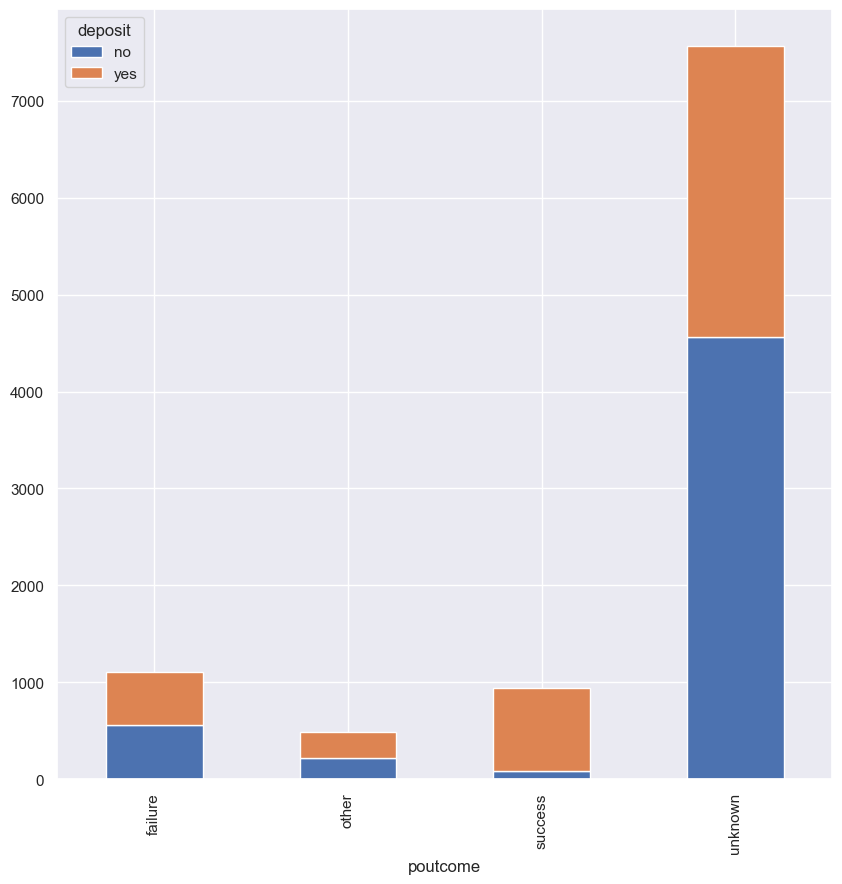

In [106]:
types = df.groupby("poutcome")['deposit'].value_counts(normalize=False).unstack()
types.plot(kind='bar', stacked='True')
plt.show()

### Задание 1

In [107]:
# изучите соотношение классов в ваших данных на предмет несбалансированности, проиллюстрируйте результат
# ваш код
df['deposit'].value_counts()


no     5424
yes    4681
Name: deposit, dtype: int64

### Задания 2 и 3

In [108]:
#рассчитайте описательные статистики для количественных переменных, проинтерпретируйте результат
#ваш код
df.describe()

age       balance           day      duration      campaign  \
count  10105.000000  10105.000000  10105.000000  10105.000000  10105.000000   
mean      40.895497    807.653538     15.590302    368.742603      2.517170   
std       11.734931    994.151966      8.441510    346.651524      2.707159   
min       18.000000  -2049.000000      1.000000      2.000000      1.000000   
25%       32.000000     95.000000      8.000000    137.000000      1.000000   
50%       38.000000    445.000000     15.000000    252.000000      2.000000   
75%       48.000000   1227.000000     22.000000    490.000000      3.000000   
max       95.000000   4063.000000     31.000000   3881.000000     43.000000   

              pdays      previous  
count  10105.000000  10105.000000  
mean      51.319644      0.816230  
std      109.644179      2.243795  
min       -1.000000      0.000000  
25%       -1.000000      0.000000  
50%       -1.000000      0.000000  
75%        2.000000      1.000000  
max      854.000000     58.000000

### Задания 4 и 5

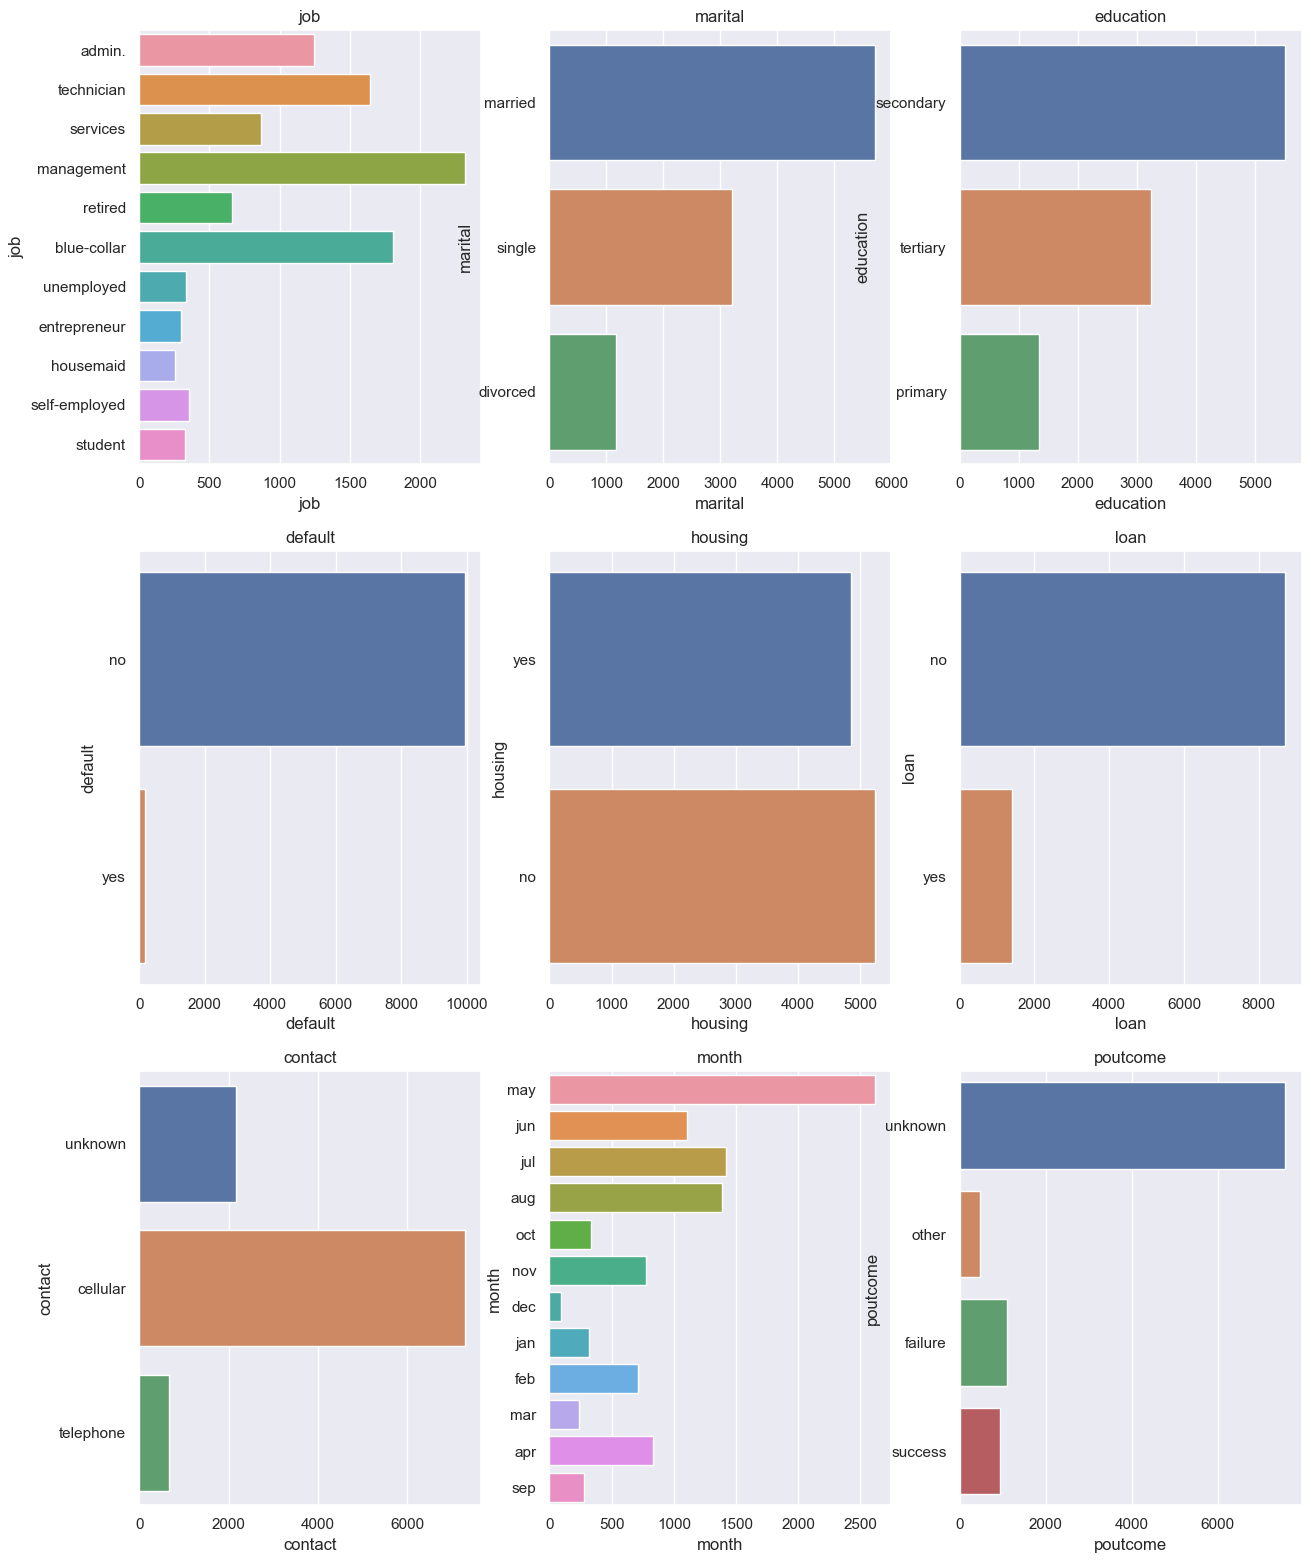

In [109]:
#рассчитайте описательные статистики для категориальных переменных, проинтерпретируйте результат
#ваш код
#постройте визуализации, иллюстрирующие результаты

# df.describe(include = 'object')

df.describe(include = 'object')
categorical_features=[feature for feature in df.columns if ((df[feature].dtypes=='O') & (feature not in ['deposit']))]
import matplotlib.pyplot as plt
plt.figure(figsize=(15,80), facecolor='white')
plotnumber =1
for categorical_feature in categorical_features:
    ax = plt.subplot(12,3,plotnumber)
    sns.countplot(y=categorical_feature,data=df)
    plt.xlabel(categorical_feature)
    plt.title(categorical_feature)
    plotnumber+=1
plt.show()

### Задание 6

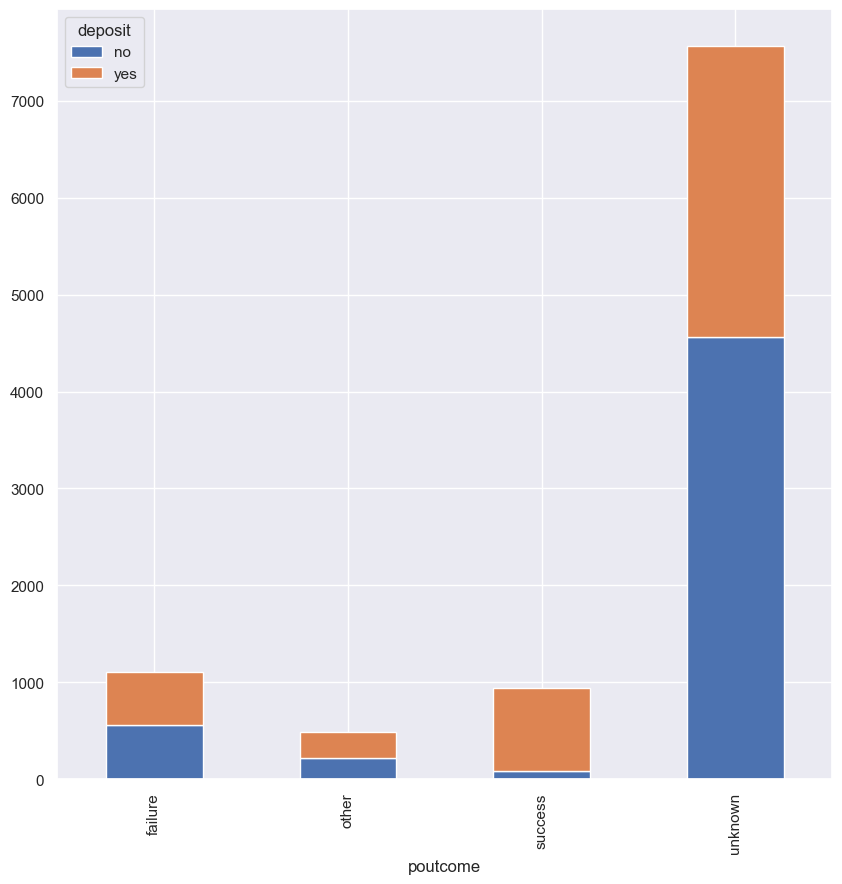

In [110]:
# Узнайте, для какого статуса предыдущей маркетинговой кампании успех в текущей превалирует над количеством неудач.
# ваш код
types = df.groupby("poutcome")['deposit'].value_counts(normalize=False).unstack()
types.plot(kind='bar', stacked='True')
plt.show()

### Задание 7

In [111]:
# узнайте, в каком месяце чаще всего отказывались от предложения открыть депозит
# ваш код
for i in np.unique(df.month):
    print(i, df[(df.month == i)&(df.deposit == 'no')].shape[0]/df[(df.month == i)].shape[0])

apr 0.3819277108433735
aug 0.5595667870036101
dec 0.0967741935483871
feb 0.45557122708039494
jan 0.6081504702194357
jul 0.5895627644569816
jun 0.5489130434782609
mar 0.10126582278481013
may 0.6786396637371036
nov 0.5846153846153846
oct 0.18507462686567164
sep 0.16546762589928057


### Задание 8

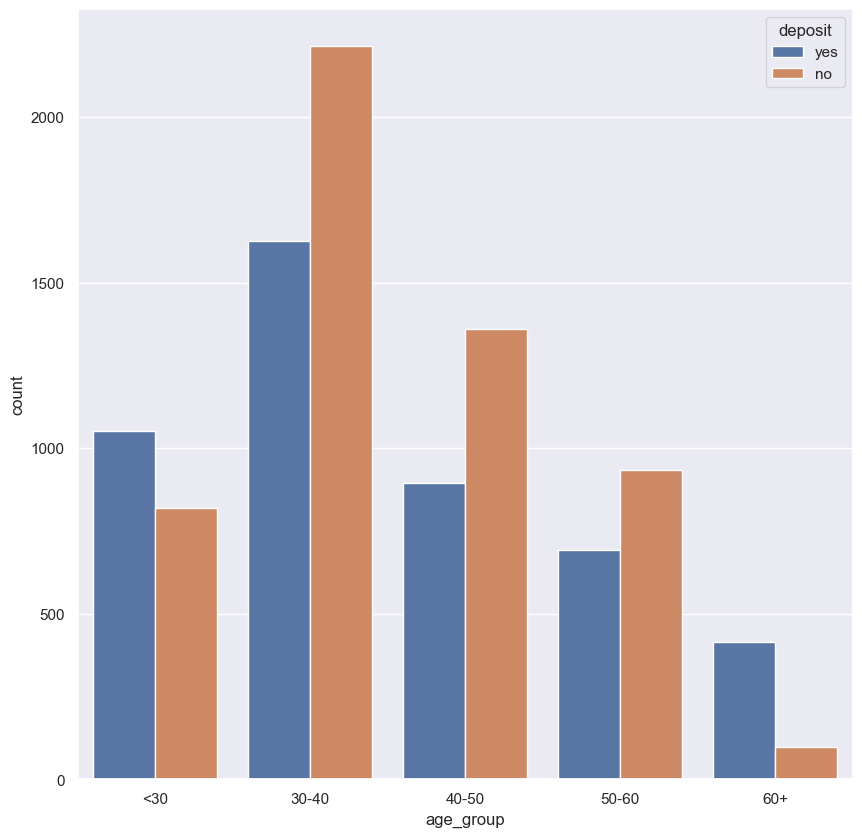

In [112]:
# создайте возрастные группы и определите, в каких группах более склонны открывать депозит, чем отказываться от предложения
df['age_group'] = pd.cut(df.age, [0,30,40,50,60,9999], labels = ['<30','30-40','40-50','50-60','60+'])
sns.countplot(x ="age_group", hue ="deposit", data=df)
plt.show()

### Задания 9 и 10

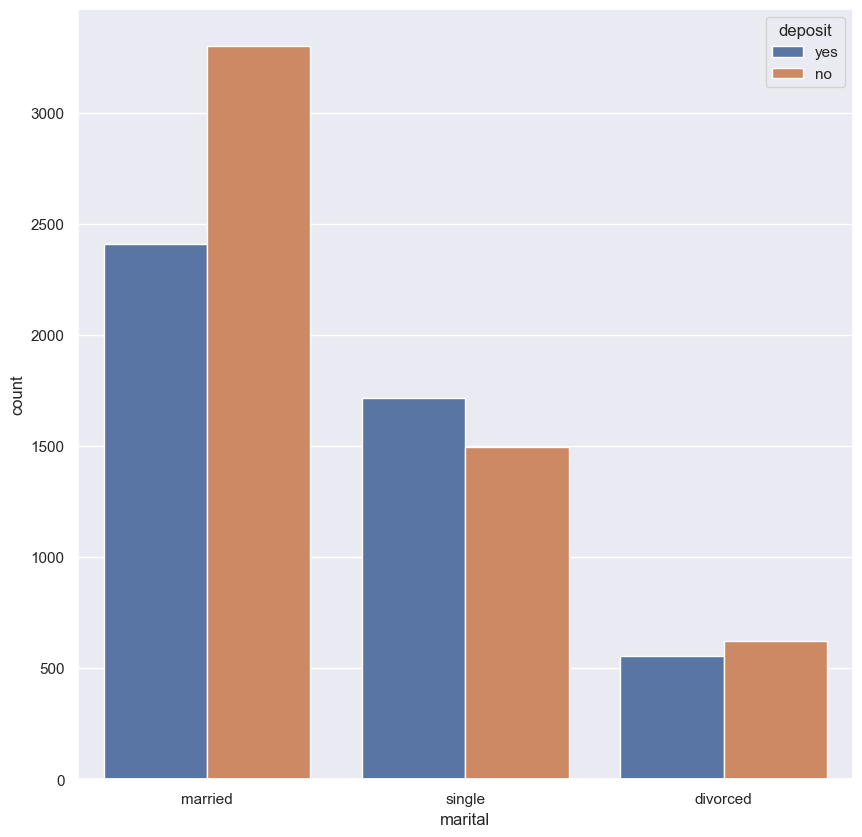

In [113]:
# постройте визуализации для открывших и неоткрывших депозит в зависимости от семейного статуса
sns.countplot(x= 'marital', hue= 'deposit', data=df)
plt.show()

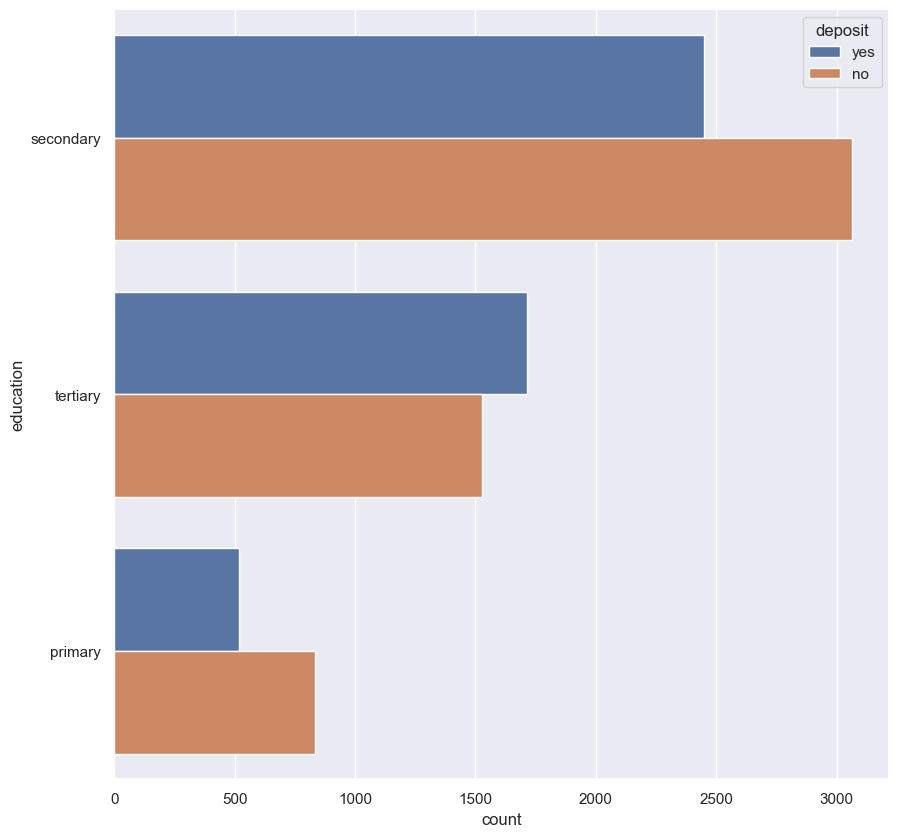

In [114]:
# постройте визуализации для открывших и неоткрывших депозит в зависимости от образования
sns.countplot(y ='education', hue ='deposit', data = df)
plt.show()

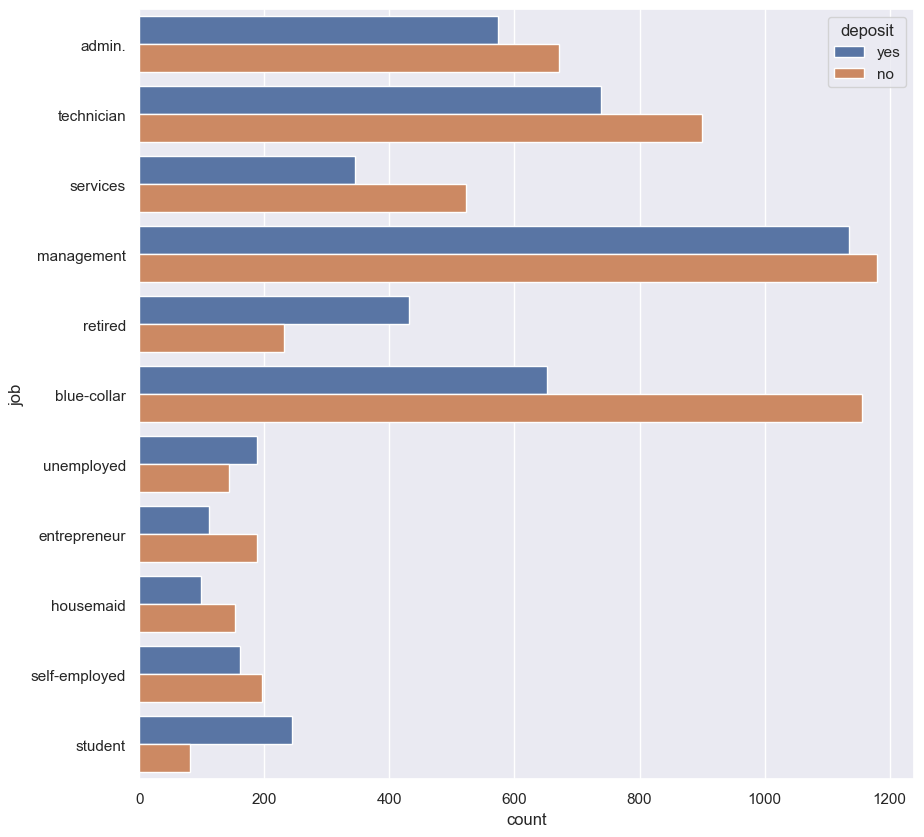

In [115]:
# постройте визуализации для открывших и неоткрывших депозит в зависимости от вида профессиональной занятости
sns.countplot(y='job', hue='deposit', data=df)
plt.show()

### Задание 11

In [116]:
# постройте сводную таблицу, чтобы определить люди с каким образованием и семейным статусом наиболее многочисленны
#(если рассматривать тех, кто открыл депозит)
bank1 = df[df.deposit == 'yes'][['education','marital','deposit']]
bank2 = df[df.deposit == 'no'][['education','marital','deposit']] 
res1 = pd.crosstab(bank1['education'],bank1['marital'])
res2 = pd.crosstab(bank2['education'],bank2['marital'])
print(res1)
print(res2)

marital    divorced  married  single
education                           
primary          96      339      82
secondary       283     1289     879
tertiary        174      784     755
marital    divorced  married  single
education                           
primary          91      641     100
secondary       370     1830     866
tertiary        163      832     531


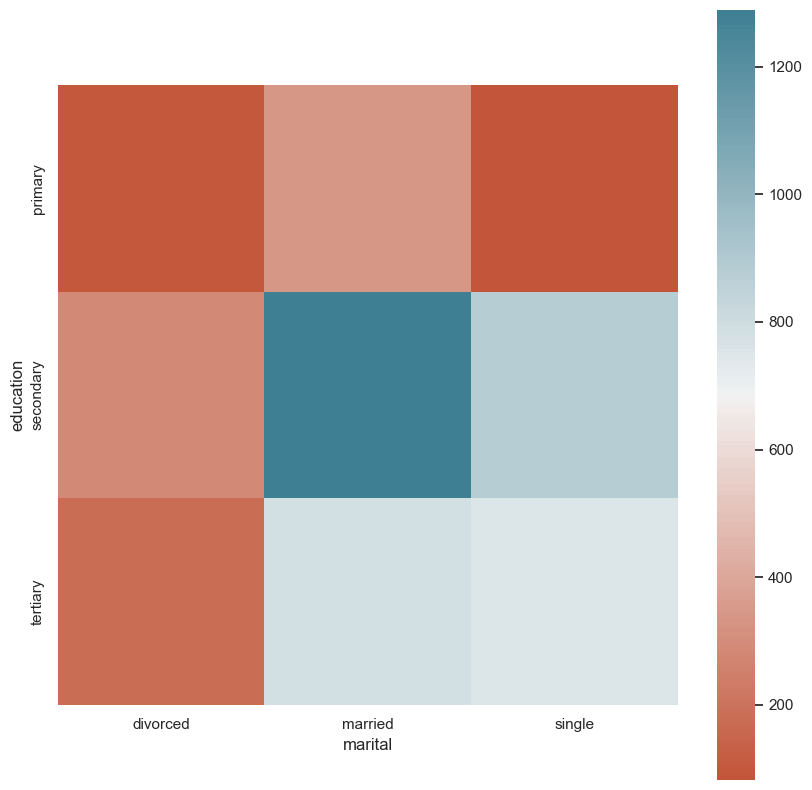

In [117]:
ax = sns.heatmap(
    res1, 
    #vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True,
)
plt.show()

## Часть 3: преобразование данных

### Задание 1

In [118]:
# преобразуйте уровни образования
# создание экземпляра класса LabelEncoder()
lab_enc = LabelEncoder()

# кодирование признака
df['education'] = lab_enc.fit_transform(df['education'])
df['education'].sum()

11995

In [119]:
# создание экземпляра класса LabelEncoder()
le = LabelEncoder()

# кодирование признака
df['age_group'] = le.fit_transform(df['age_group'])
df['age_group']

0        2
1        2
2        1
3        2
4        2
        ..
10100    0
10101    0
10102    0
10103    1
10104    0
Name: age_group, Length: 10105, dtype: int32

### Задания 2 и 3

In [120]:
# преобразуйте бинарные переменные в представление из нулей и единиц
def bin_func(row):
    if row == 'yes':
        return 1
    else:
        return 0

df['deposit'] = df['deposit'].apply(bin_func)

In [121]:
df['deposit'].std()

0.4986712532452124

In [122]:
df['default'] = df['default'].apply(bin_func)
df['housing'] = df['housing'].apply(bin_func)
df['loan'] = df['loan'].apply(bin_func)

df.head()

age         job  marital  education  default  balance  housing  loan  \
0   59      admin.  married          1        0   2343.0        1     0   
1   56      admin.  married          1        0     45.0        0     0   
2   41  technician  married          1        0   1270.0        1     0   
3   55    services  married          1        0   2476.0        1     0   
4   54      admin.  married          2        0    184.0        0     0   

   contact  day month  duration  campaign  pdays  previous poutcome  deposit  \
0  unknown    5   may      1042         1     -1         0  unknown        1   
1  unknown    5   may      1467         1     -1         0  unknown        1   
2  unknown    5   may      1389         1     -1         0  unknown        1   
3  unknown    5   may       579         1     -1         0  unknown        1   
4  unknown    5   may       673         2     -1         0  unknown        1   

   age_group  
0          2  
1          2  
2          1  
3          2  
4          2

In [123]:
res = df['default'].mean() + df['housing'].mean() + df['loan'].mean()
res

0.6354280059376547

### Задание 4

In [124]:
# создайте дамми-переменные
categorial_features = ['job', 'marital', 'contact', 'month', 'poutcome']
df1= pd.get_dummies(df[categorial_features])
df = pd.concat([df,df1], axis = 1)

df.head()

age         job  marital  education  default  balance  housing  loan  \
0   59      admin.  married          1        0   2343.0        1     0   
1   56      admin.  married          1        0     45.0        0     0   
2   41  technician  married          1        0   1270.0        1     0   
3   55    services  married          1        0   2476.0        1     0   
4   54      admin.  married          2        0    184.0        0     0   

   contact  day  ... month_jun  month_mar  month_may  month_nov  month_oct  \
0  unknown    5  ...         0          0          1          0          0   
1  unknown    5  ...         0          0          1          0          0   
2  unknown    5  ...         0          0          1          0          0   
3  unknown    5  ...         0          0          1          0          0   
4  unknown    5  ...         0          0          1          0          0   

  month_sep  poutcome_failure  poutcome_other  poutcome_success  \
0         0                 0               0                 0   
1         0                 0               0                 0   
2         0                 0               0                 0   
3         0                 0               0                 0   
4         0                 0               0                 0   

   poutcome_unknown  
0                 1  
1                 1  
2                 1  
3                 1  
4                 1  

[5 rows x 51 columns]

### Задания 5 и 6

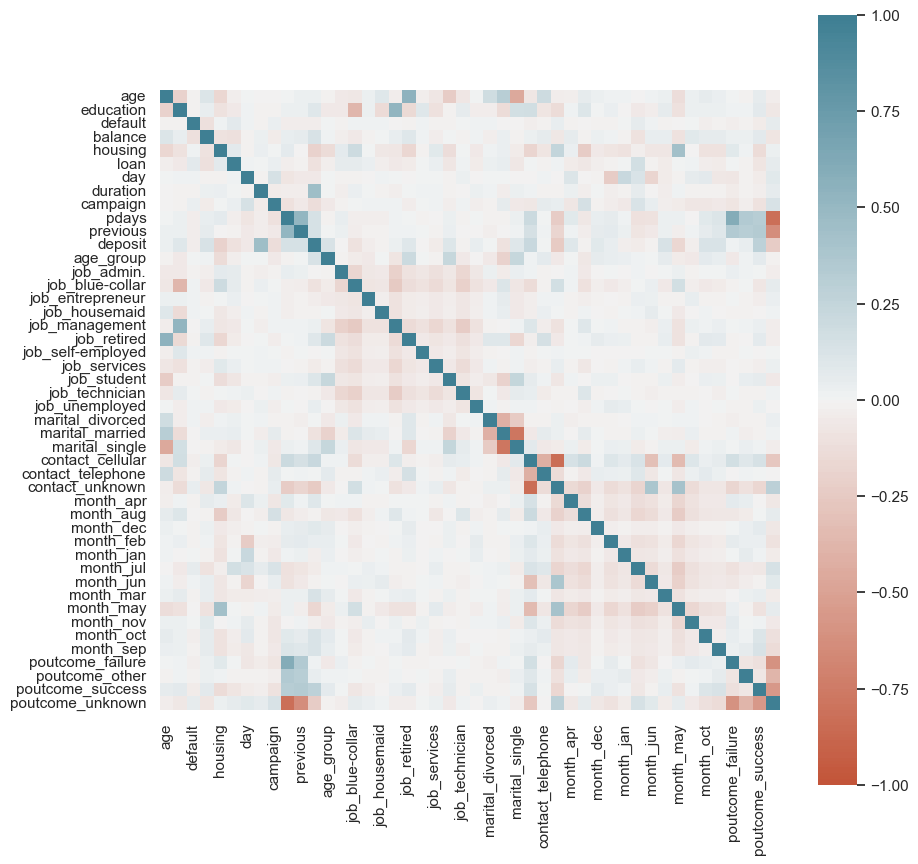

In [125]:
# постройте корреляционную матрицу и оцените данные на предмет наличия мультиколлинеарности
corr = df.corr()

sns.set(rc={'figure.figsize':(10, 10)})

ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True,
)
plt.show()

In [126]:
new_corr = corr['deposit'].reset_index()
sort_corr = new_corr.sort_values('deposit', ascending=False)
sort_corr.head()

index   deposit
11           deposit  1.000000
7           duration  0.457818
44  poutcome_success  0.288491
27  contact_cellular  0.223944
9              pdays  0.147917

### Задания 7 и 8

In [127]:
df = df.drop(['job', 'marital', 'contact', 'month', 'poutcome'], axis=1)

In [128]:
X = df.drop(['deposit'], axis=1)
y = df['deposit']
 
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state = 42, test_size = 0.33)

In [129]:
# рассчитайте необходимые показатели
print(y_test.shape)
print(y_test.mean())

(3335,)
0.46326836581709147


In [130]:
df.head()

age  education  default  balance  housing  loan  day  duration  campaign  \
0   59          1        0   2343.0        1     0    5      1042         1   
1   56          1        0     45.0        0     0    5      1467         1   
2   41          1        0   1270.0        1     0    5      1389         1   
3   55          1        0   2476.0        1     0    5       579         1   
4   54          2        0    184.0        0     0    5       673         2   

   pdays  ...  month_jun  month_mar  month_may  month_nov  month_oct  \
0     -1  ...          0          0          1          0          0   
1     -1  ...          0          0          1          0          0   
2     -1  ...          0          0          1          0          0   
3     -1  ...          0          0          1          0          0   
4     -1  ...          0          0          1          0          0   

   month_sep  poutcome_failure  poutcome_other  poutcome_success  \
0          0                 0               0                 0   
1          0                 0               0                 0   
2          0                 0               0                 0   
3          0                 0               0                 0   
4          0                 0               0                 0   

   poutcome_unknown  
0                 1  
1                 1  
2                 1  
3                 1  
4                 1  

[5 rows x 46 columns]

### Задание 9

In [131]:
# с помощью SelectKBest отберите 15 наиболее подходящих признаков
from sklearn.feature_selection import SelectKBest, f_classif
select_k_best_classifier = SelectKBest(score_func=f_classif, k=15).fit(X_train, y_train)
select_k_best_classifier.get_support()
feature_names = list(X_train.columns.values)
mask = select_k_best_classifier.get_support()
new_features = []

for bool, feature in zip(mask, feature_names):
    if bool:
        new_features.append(feature)
new_features


['balance',
 'housing',
 'duration',
 'campaign',
 'pdays',
 'previous',
 'age_group',
 'contact_cellular',
 'contact_unknown',
 'month_mar',
 'month_may',
 'month_oct',
 'month_sep',
 'poutcome_success',
 'poutcome_unknown']

### Задание 10

In [132]:
df = df[['balance', 'housing', 'duration', 'campaign', 'pdays', 
         'previous', 'age_group', 'contact_cellular', 'contact_unknown',
         'month_mar', 'month_may', 'month_oct', 'month_sep', 'poutcome_success', 'poutcome_unknown', 'deposit']]

X = df.drop(['deposit'], axis=1)
y = df['deposit']
 
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state = 42, test_size = 0.33)

In [133]:
# нормализуйте данные с помощью minmaxsxaler
scaler = preprocessing.MinMaxScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

print(X_test_scaled[:, 0].mean())  # для признака balance

0.46823674223097866


In [134]:
df.head()

balance  housing  duration  campaign  pdays  previous  age_group  \
0   2343.0        1      1042         1     -1         0          2   
1     45.0        0      1467         1     -1         0          2   
2   1270.0        1      1389         1     -1         0          1   
3   2476.0        1       579         1     -1         0          2   
4    184.0        0       673         2     -1         0          2   

   contact_cellular  contact_unknown  month_mar  month_may  month_oct  \
0                 0                1          0          1          0   
1                 0                1          0          1          0   
2                 0                1          0          1          0   
3                 0                1          0          1          0   
4                 0                1          0          1          0   

   month_sep  poutcome_success  poutcome_unknown  deposit  
0          0                 0                 1        1  
1          0                 0                 1        1  
2          0                 0                 1        1  
3          0                 0                 1        1  
4          0                 0                 1        1

In [135]:
len(X_test_scaled)

3335

# Часть 4: Решение задачи классификации: логистическая регрессия и решающие деревья

### Задание 1

In [136]:
# обучите логистическую регрессию и рассчитайте метрики качества
log_reg = linear_model.LogisticRegression(
    solver='sag', random_state=42, max_iter=1000 )

log_reg.fit(X_train_scaled, y_train)
y_train_pred = log_reg.predict(X_train_scaled)

print(metrics.classification_report(y_train, y_train_pred))

y_test_pred = log_reg.predict(X_test_scaled)

print(metrics.classification_report(y_test, y_test_pred))
print('Test accuracy: {:.2f}'.format(metrics.accuracy_score(y_test, y_test_pred)))

              precision    recall  f1-score   support

           0       0.81      0.88      0.84      3634
           1       0.84      0.76      0.80      3136

    accuracy                           0.82      6770
   macro avg       0.83      0.82      0.82      6770
weighted avg       0.83      0.82      0.82      6770

              precision    recall  f1-score   support

           0       0.79      0.87      0.83      1790
           1       0.83      0.74      0.78      1545

    accuracy                           0.81      3335
   macro avg       0.81      0.80      0.81      3335
weighted avg       0.81      0.81      0.81      3335

Test accuracy: 0.81


### Задания 2,3,4

In [137]:
# обучите решающие деревья, настройте максимальную глубину
dt = tree.DecisionTreeClassifier(
    criterion='entropy',
    random_state=42,
    max_depth = 6
)
dt.fit(X_train_scaled, y_train)
y_train_pred = dt.predict(X_train_scaled)

print('Train: {:.2f}'.format(metrics.accuracy_score(y_train, y_train_pred)))

y_test_pred = dt.predict(X_test_scaled)

print('Test: {:.2f}'.format(metrics.accuracy_score(y_test, y_test_pred)))

Train: 0.82
Test: 0.81


### Задание 5

In [138]:
# подберите оптимальные параметры с помощью gridsearch
from sklearn.model_selection import GridSearchCV
parameters =  {'min_samples_split': [2, 5, 7, 10], 'max_depth':[3,5,7]}
model_cv = GridSearchCV(tree.DecisionTreeClassifier(), parameters,
 cv=3, scoring=('f1'), return_train_score=True)
model_cv.fit(X_train_scaled, y_train)

print("Наилучшие значения параметров: {}".format(model_cv.best_params_))

y_test_pred = model_cv.predict(X_test_scaled)

print('f1_score на тестовом наборе: {:.2f}'.format(metrics.f1_score(y_test, y_test_pred)))

Наилучшие значения параметров: {'max_depth': 7, 'min_samples_split': 5}
f1_score на тестовом наборе: 0.80


# Часть 5: Решение задачи классификации: ансамбли моделей и построение прогноза

### Задание 1

In [139]:
# обучите на ваших данных случайный лес
rf = ensemble.RandomForestClassifier(
    n_estimators=100,
    criterion='gini',
    min_samples_leaf=5,
    max_depth=10,
    random_state=42
)
#Обучаем модель
rf.fit(X_train_scaled, y_train)
#Выводим значения метрики 
y_train_pred = rf.predict(X_train_scaled)
print('Train: {:.2f}'.format(metrics.accuracy_score(y_train, y_train_pred)))
y_test_pred = rf.predict(X_test_scaled)
print('Test accuracy: {:.2f}'.format(metrics.accuracy_score(y_test, y_test_pred)))
print()
print('Train: {:.2f}'.format(metrics.recall_score(y_train, y_train_pred)))
print('Test recall: {:.2f}'.format(metrics.recall_score(y_test, y_test_pred)))

Train: 0.86
Test accuracy: 0.83

Train: 0.86
Test recall: 0.83


### Задания 2 и 3

In [140]:
# используйте для классификации градиентный бустинг и сравните качество со случайным лесом
gb = ensemble.GradientBoostingClassifier(
    learning_rate=0.05,
    n_estimators=300,
    min_samples_leaf=5,
    max_depth=5,
    random_state=42
)
gb.fit(X_train_scaled, y_train)

y_train_pred = gb.predict(X_train_scaled)

print('Train: {:.2f}'.format(metrics.f1_score(y_train, y_train_pred)))

y_test_pred = gb.predict(X_test_scaled)
print('Test: {:.2f}'.format(metrics.f1_score(y_test, y_test_pred)))

Train: 0.88
Test: 0.82


In [141]:
estimators = [
    ('dt', tree.DecisionTreeClassifier(
        criterion='entropy',
        min_samples_leaf=5,
        max_depth=6,
        random_state=42
        )
    ),
    ('log_reg', linear_model.LogisticRegression(
        solver='sag',
        random_state=42 
        )
    ),
    ('gb', ensemble.GradientBoostingClassifier(
        learning_rate=0.05,
        n_estimators=300,
        min_samples_leaf=5,
        max_depth=5,
        random_state=42
        )
    )
]

stack = ensemble.StackingClassifier(
    estimators,
    final_estimator=linear_model.LogisticRegression(random_state=42)
)
stack.fit(X_train_scaled, y_train)

y_train_pred = stack.predict(X_train_scaled)
#print('Train: {:.2f}'.format(metrics.precision(y_train, y_train_pred)))
y_test_pred = stack.predict(X_test_scaled)
#print('Test: {:.2f}'.format(metrics.precision(y_test, y_test_pred)))

print(metrics.classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.84      0.84      0.84      1790
           1       0.81      0.81      0.81      1545

    accuracy                           0.82      3335
   macro avg       0.82      0.82      0.82      3335
weighted avg       0.82      0.82      0.82      3335



### Задание 4

In [142]:
# объедините уже известные вам алгоритмы с помощью стекинга 
estimators = [
('dtc', tree.DecisionTreeClassifier(criterion='entropy', random_state=42, max_depth=6)),
('rf', ensemble.RandomForestClassifier(
    n_estimators=100,
    criterion='gini',
    min_samples_leaf=5,
    max_depth=10,
    random_state=42
)),
('gb', ensemble.GradientBoostingClassifier(min_samples_leaf=5, learning_rate=0.05, n_estimators=300, max_depth=5, random_state=42))
]
#Создаем объект класса стекинг
reg = ensemble.StackingClassifier(
    estimators=estimators,
    final_estimator=linear_model.LogisticRegression(random_state=42))

#Обучаем модель
reg.fit(X_train_scaled, y_train)

# Выводим значения метрики
y_train_pred = reg.predict(X_train_scaled)
print('F1 Train: {:.2f}'.format(metrics.f1_score(y_train, y_train_pred)))
y_test_pred = reg.predict(X_test_scaled)
print('F1 Test: {:.2f}'.format(metrics.f1_score(y_test, y_test_pred)))


F1 Train: 0.86
F1 Test: 0.81


### Задание 5

Feature: 0, Score: 0.05795
Feature: 1, Score: 0.04773
Feature: 2, Score: 0.50711
Feature: 3, Score: 0.01478
Feature: 4, Score: 0.05508
Feature: 5, Score: 0.00845
Feature: 6, Score: 0.03990
Feature: 7, Score: 0.00362
Feature: 8, Score: 0.07258
Feature: 9, Score: 0.02782
Feature: 10, Score: 0.01521
Feature: 11, Score: 0.01988
Feature: 12, Score: 0.01353
Feature: 13, Score: 0.11496
Feature: 14, Score: 0.00141


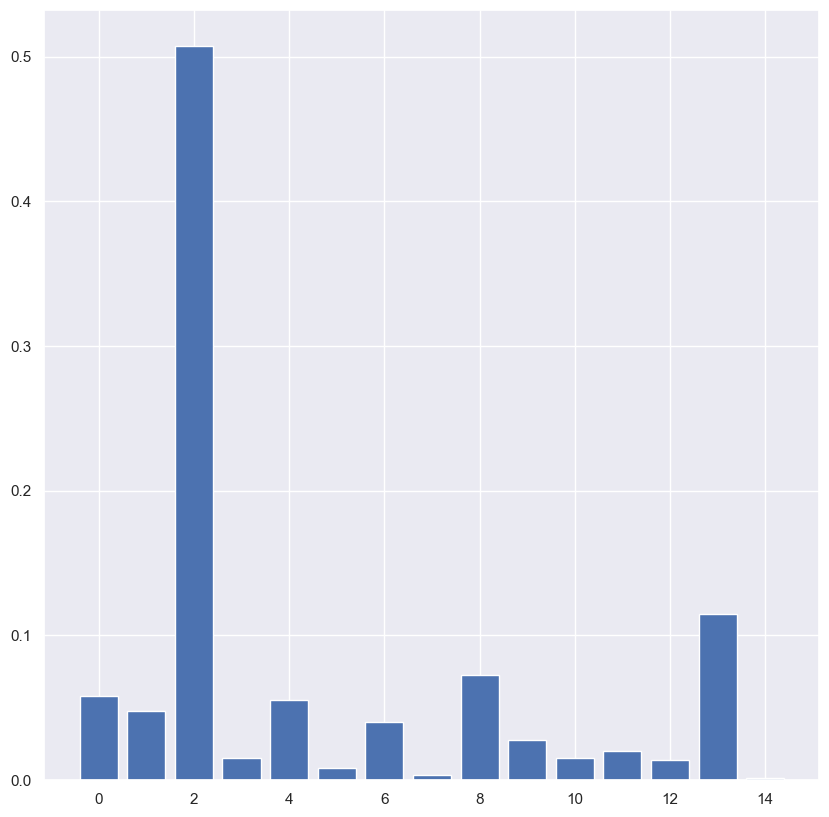

In [143]:
# оцените, какие признаки демонстрируют наибольшую  важность в модели градиентного бустинга
import matplotlib.pyplot  as plt
importance = gb.feature_importances_
for i,v in enumerate(importance):
  print('Feature: %0d, Score: %.5f' % (i,v))
plt.bar([x for x in range(len(importance))], importance)
plt.show()

### Задания 6,7,8

In [144]:
# реализуйте оптимизацию гиперпараметров с помощью Optuna
import optuna

def optuna_rf(trial):
  n_estimators = trial.suggest_int('n_estimators', 100, 200, 1)
  max_depth = trial.suggest_int('max_depth', 10, 30, 1)
  min_samples_leaf = trial.suggest_int('min_samples_leaf', 2, 10, 1)

  model = ensemble.RandomForestClassifier(n_estimators=n_estimators,
                                          max_depth=max_depth,
                                          min_samples_leaf=min_samples_leaf,
                                          random_state=42)
  model.fit(X_train_scaled, y_train)
  score = metrics.f1_score(y_train, model.predict(X_train_scaled))

  return score

study = optuna.create_study()

study.optimize(optuna_rf, n_trials=20)
model = ensemble.RandomForestClassifier(**study.best_params,random_state=42, )
model.fit(X_train_scaled, y_train)
y_train_pred = model.predict(X_train_scaled)

print("accuracy на тестовом наборе: {:.3f}".format(model.score(X_test_scaled, y_test)))
y_test_pred = model.predict(X_test_scaled)
print('f1_score на тестовом наборе: {:.3f}'.format(metrics.f1_score(y_test, y_test_pred)))

[I 2022-12-06 10:03:36,883] A new study created in memory with name: no-name-6698799a-ade1-4455-ba42-1cd1af5fb1ae
[I 2022-12-06 10:03:37,581] Trial 0 finished with value: 0.8929854710201529 and parameters: {'n_estimators': 101, 'max_depth': 24, 'min_samples_leaf': 3}. Best is trial 0 with value: 0.8929854710201529.
[I 2022-12-06 10:03:38,719] Trial 1 finished with value: 0.8556717116554845 and parameters: {'n_estimators': 183, 'max_depth': 15, 'min_samples_leaf': 7}. Best is trial 1 with value: 0.8556717116554845.
[I 2022-12-06 10:03:39,896] Trial 2 finished with value: 0.8662400499453723 and parameters: {'n_estimators': 178, 'max_depth': 29, 'min_samples_leaf': 5}. Best is trial 1 with value: 0.8556717116554845.
[I 2022-12-06 10:03:41,250] Trial 3 finished with value: 0.8567424478355652 and parameters: {'n_estimators': 188, 'max_depth': 17, 'min_samples_leaf': 7}. Best is trial 1 with value: 0.8556717116554845.
[I 2022-12-06 10:03:42,177] Trial 4 finished with value: 0.861446728385375

accuracy на тестовом наборе: 0.824
f1_score на тестовом наборе: 0.813


In [145]:
def optuna_rf(trial):
  # задаем пространства поиска гиперпараметров
  n_estimators = trial.suggest_int('n_estimators', 100, 200, 1)
  max_depth = trial.suggest_int('max_depth', 10, 30, 1)
  min_samples_leaf = trial.suggest_int('min_samples_leaf', 2, 10, 1)
  # создаем модель
  model = ensemble.RandomForestClassifier(n_estimators=n_estimators,
                                          max_depth=max_depth,
                                          min_samples_leaf=min_samples_leaf,
                                          random_state=42
                                          )
  # обучаем модель
  model.fit(X_train_scaled, y_train)
  score = metrics.f1_score(y_train, model.predict(X_train_scaled))
  return score

study = optuna.create_study(study_name="RandomForestClassifier", direction="maximize")
study.optimize(optuna_rf, n_trials=20)

'''
study = optuna.create_study()
study.optimize(optuna_rf, n_trials=10)
model = ensemble.RandomForestClassifier(**study.best_params,random_state=42, )
model.fit(X_train_scaled, y_train)
'''

[I 2022-12-06 10:03:55,451] A new study created in memory with name: RandomForestClassifier
[I 2022-12-06 10:03:56,685] Trial 0 finished with value: 0.8497652582159624 and parameters: {'n_estimators': 186, 'max_depth': 21, 'min_samples_leaf': 9}. Best is trial 0 with value: 0.8497652582159624.
[I 2022-12-06 10:03:57,814] Trial 1 finished with value: 0.859597063876308 and parameters: {'n_estimators': 161, 'max_depth': 15, 'min_samples_leaf': 6}. Best is trial 1 with value: 0.859597063876308.
[I 2022-12-06 10:03:58,475] Trial 2 finished with value: 0.8441926345609067 and parameters: {'n_estimators': 109, 'max_depth': 28, 'min_samples_leaf': 10}. Best is trial 1 with value: 0.859597063876308.
[I 2022-12-06 10:03:59,119] Trial 3 finished with value: 0.8571428571428571 and parameters: {'n_estimators': 119, 'max_depth': 14, 'min_samples_leaf': 6}. Best is trial 1 with value: 0.859597063876308.
[I 2022-12-06 10:03:59,959] Trial 4 finished with value: 0.8802376485303314 and parameters: {'n_est

'\nstudy = optuna.create_study()\nstudy.optimize(optuna_rf, n_trials=10)\nmodel = ensemble.RandomForestClassifier(**study.best_params,random_state=42, )\nmodel.fit(X_train_scaled, y_train)\n'